### Reading and exploring data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Import the necessary libraries

# Load the training and test data from CSV files
train_df = pd.read_csv('data/satellite_training.csv')
test_df = pd.read_csv('data/satellite_test.csv')

# Display the data types of the columns in the training and test data
print("Data Types in the Training Data:")
print(train_df.dtypes)
print("\nData Types in the Test Data:")
print(test_df.dtypes)

# Check for any missing values in the training and test data
print("\nMissing Values in the Training Data:")
print(train_df.isnull().sum())
print("\nMissing Values in the Test Data:")
print(test_df.isnull().sum())

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)


Data Types in the Training Data:
F0       int64
F1       int64
F2       int64
F3       int64
F4       int64
F5       int64
F6       int64
F7       int64
F8       int64
F9       int64
F10      int64
F11      int64
F12      int64
F13      int64
F14      int64
F15      int64
F16      int64
F17      int64
F18      int64
F19      int64
F20      int64
F21      int64
F22      int64
F23      int64
F24      int64
F25      int64
F26      int64
F27      int64
F28      int64
F29      int64
F30      int64
F31      int64
F32      int64
F33      int64
F34      int64
F35      int64
Class    int64
dtype: object

Data Types in the Test Data:
F0       int64
F1       int64
F2       int64
F3       int64
F4       int64
F5       int64
F6       int64
F7       int64
F8       int64
F9       int64
F10      int64
F11      int64
F12      int64
F13      int64
F14      int64
F15      int64
F16      int64
F17      int64
F18      int64
F19      int64
F20      int64
F21      int64
F22      int64
F23      int64
F24     

###  Decision tree classifier

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import the necessary libraries

# Split the training and test data into features and labels
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8485
Precision: 0.8512613454296937
Recall: 0.8485
F1 Score: 0.849620114635563


### Defining set of parameters

In [5]:
# Define the parameters for the DecisionTreeClassifier
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

### Running  grid search algorithm

In [9]:
from sklearn.model_selection import GridSearchCV

# Import the necessary libraries

# Perform grid search to find the best parameters
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best score and parameters
best_score = grid_search.best_score_
best_params = grid_search.best_params_

# Print the results
print('Grid Search Results:')
print('Best score:', best_score)
print('Best parameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

Grid Search Results:
Best score: 0.8275084554678692
Best parameters:
criterion: entropy
max_depth: 5
min_samples_leaf: 2
min_samples_split: 10


### Choosing  best three combinations and run each 10 times

In [10]:
import numpy as np

# Get the top 3 parameters from the grid search
top3_params = grid_search.cv_results_['params'][:3]

# Run each parameter setting 10 times
results = []
for params in top3_params:
    accuracies = []
    for _ in range(10):
        # Create a decision tree classifier with the given parameters
        clf = DecisionTreeClassifier(**params)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    results.append(np.mean(accuracies))

# Print the average accuracies
print('Average accuracies:', results)

Average accuracies: [0.85145, 0.8510500000000001, 0.8498999999999999]


## Task 2:


### Reading and exploring the data

In [12]:
import torch
from torchvision import datasets, transforms
import utils

# Import the necessary libraries

# Set up the data transformation
transform = transforms.ToTensor()

# Download and load the FashionMNIST dataset
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

# Display an image from the training data
utils.show(train_data[0][0])

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('Class names:', class_names)

100%|██████████████████████████| 26421880/26421880 [00:06<00:00, 4197252.99it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 270016.23it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|████████████████████████████| 4422102/4422102 [00:02<00:00, 2201517.82it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████████████████████████████| 5148/5148 [00:00<00:00, 2749557.75it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

WRONG TENSOR SIZE
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### images

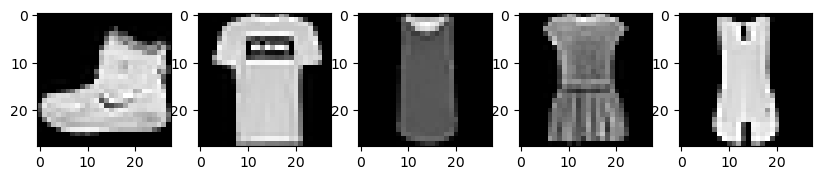

In [14]:
import matplotlib.pyplot as plt

# Create a figure with 5 subplots
fig, axes = plt.subplots(1, 5, figsize=(10, 2))

# Iterate over the first 5 images in the training data
for i in range(5):
    # Reshape the image to 28x28 and display it in grayscale
    axes[i].imshow(train_data[i][0].reshape(28, 28), cmap='gray')

# Display the plot
plt.show()

### Writing two-layer FNN

In [15]:
import torch
from torch import nn

# Define the FNN model
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.softmax(self.fc4(x), dim=1)
        return x

# Create an instance of the FNN model
model = FNN()

# Calculate and display the number of parameters in the model
total_params = sum(p.numel() for p in model.parameters())
print('Number of parameters:', total_params)

Number of parameters: 242762


### Creating a model and displaying probabilites

In [16]:
# Select a random image from the training data
random_image = train_data[0][0]

# Pass the image through the model to get the output probabilities
output = model(torch.unsqueeze(random_image, 0))

# Print the output probabilities
print('Output probabilities:', output)

Output probabilities: tensor([[0.0876, 0.1092, 0.1128, 0.0911, 0.0984, 0.0942, 0.1020, 0.1031, 0.0995,
         0.1021]], grad_fn=<SoftmaxBackward0>)


### Running  training

In [17]:
from torch import optim
from torch.utils.data import DataLoader

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create a data loader for the training data
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Run the training loop
for epoch in range(5):  # 5 epochs
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(images)

        # Calculate the loss
        loss = criterion(output, labels)

        # Backward pass
        loss.backward()

        # Update the model parameters
        optimizer.step()

### Making a prediction

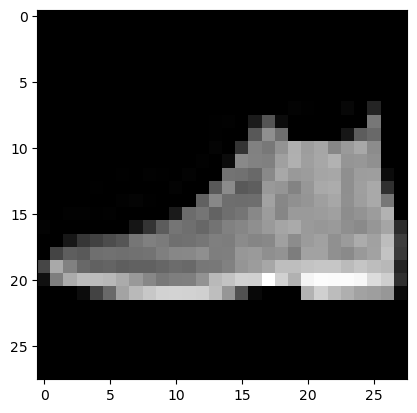

Returned probabilities: tensor([[8.7916e-14, 1.6814e-06, 1.1450e-10, 1.3763e-08, 3.0871e-10, 9.3521e-08,
         5.3007e-14, 1.2096e-04, 2.8666e-10, 9.9988e-01]],
       grad_fn=<SoftmaxBackward0>)


In [18]:
# Select a random image from the test set
random_image = test_data[0][0]

# Display the random image
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.show()

# Pass the image through the model to get the output probabilities
output = model(torch.unsqueeze(random_image, 0))

# Print the returned probabilities
print('Returned probabilities:', output)

### Reporting  accuracy, precision, recall, and F1 score

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a data loader for the test set
test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=True)
images, labels = next(iter(test_loader))

# Make predictions on the test set
output = model(images)
_, predicted = torch.max(output, 1)

# Calculate the metrics
accuracy = accuracy_score(labels, predicted)
precision = precision_score(labels, predicted, average='weighted')
recall = recall_score(labels, predicted, average='weighted')
f1 = f1_score(labels, predicted, average='weighted')

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.788
Precision: 0.731258826034412
Recall: 0.788
F1 Score: 0.754744902359575


/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Task 3:


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define the ConvNet model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

model = ConvNet()

criterion = nn.CrossEntropyLoss()
batch_size = 64
epochs = 5
learning_rate = 0.01

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Create the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Test the model
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy of the network on the 10000 test images: %.2f %%' % accuracy)

# Make a single prediction
random_index = torch.randint(len(test_dataset), size=(1,)).item()
image, label = test_dataset[random_index]
output = model(image.unsqueeze(0))
probs = F.softmax(output, dim=1)

# Display the image and the predicted probabilities
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap='gray')
plt.show()
print('Predicted probabilities:', probs.squeeze())

100%|████████████████████████████| 9912422/9912422 [00:01<00:00, 4972979.06it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████████| 28881/28881 [00:00<00:00, 6396097.67it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 2695188.49it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 4539082.38it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/home/ubuntu/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:1345: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


###  Reporting accuracy, precision, recall, and  F1 score 

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        predicted = torch.argmax(output, dim=1)

        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)